<a href="https://colab.research.google.com/github/suleman84/Malaria-Project/blob/master/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/cell-images/'

In [3]:
import os
import sys
import numpy as np
# import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Activation

Using TensorFlow backend.


In [0]:
parapath = "gdrive/My Drive/cell-images/Parasitized/"
uninpath = "gdrive/My Drive/cell-images//Uninfected/"
parastized = os.listdir(parapath)
uninfected = os.listdir(uninpath)

In [0]:
data = []
label = []
for para in parastized:
    try:
        img = image.load_img(parapath + para, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(1)
    except:
        print("Can't add "+para+" in the dataset")

In [0]:
for unin in uninfected:
    try:
        img = image.load_img(uninpath + unin, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(0)
    except:
         print("Can't add "+unin+" in the dataset")

In [0]:
data = np.array(data)
label = np.array(label)

In [8]:
print(sys.getsizeof(data))
print(data.shape)

263454864
(1340, 128, 128, 3)


In [0]:
data = data/255
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.1,random_state=0)

In [0]:
def MalariaModel():
    model = Sequential()
    #layer 1
    model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (128, 128, 3)))  
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(BatchNormalization())
    #layer 2
    model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(BatchNormalization())
    #layer 3
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    #layer 4
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    #layer 5
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(BatchNormalization())
    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(256, activation = 'relu'))
#     model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    # 2nd Dense Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    # 3rd Dense Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    # Output Layer
#     model.add(Dense(1, activation = 'sigmoid', name = 'prediction'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # (4) Compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    

In [11]:
modelone = MalariaModel()
modelone.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 4)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 4)         16        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization_2

In [12]:
output = modelone.fit(x_train, y_train,epochs=1, batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1206/1206 [==============================] - 30s 25ms/step - loss: 0.8742 - acc: 0.5100


In [13]:
preds = modelone.evaluate(x = x_test,y = y_test)
print("Test Accuracy : %.2f%%" % (preds[1]*100))

134/134 [==============================] - 2s 12ms/step
Test Accuracy : 63.43%


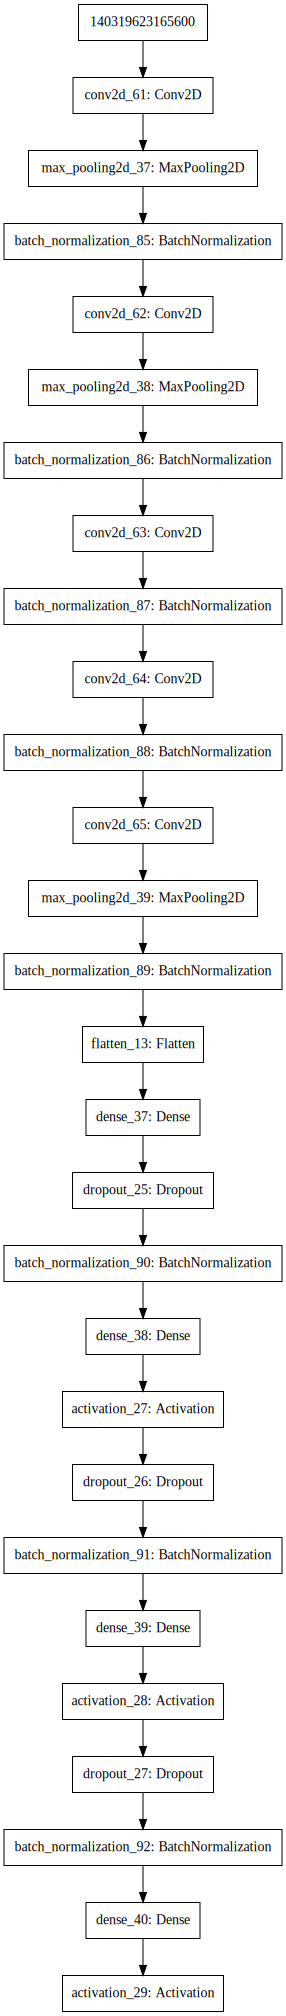

In [0]:
modelpic = plot_model(modelone, to_file='model.png')
SVG(model_to_dot(modelone).create(prog='dot', format='svg'))